# YOLO

YOLO (You Only Look Once) is an object detection model that predicts **bounding boxes** and **class labels** for multiple objects in a single forward pass of a neural network. YOLO treats detection as a regression problem, directly learning to map an input image to object locations and categories. This design makes YOLO extremely fast while maintaining strong accuracy, which is why it is used in real-time applications.

In [2]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

I'm using the YOLO12s pretrained model. There are different model sizes (n, s, m, l, x) that trade off speed for accuracy depending on the application. I don't use a GPU so my inference does not quite in real-time applications.


0: 640x640 5 persons, 4 bicycles, 256.2ms
1: 640x640 1 bear, 256.2ms
2: 640x640 4 persons, 1 airplane, 256.2ms
Speed: 24.6ms preprocess, 256.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


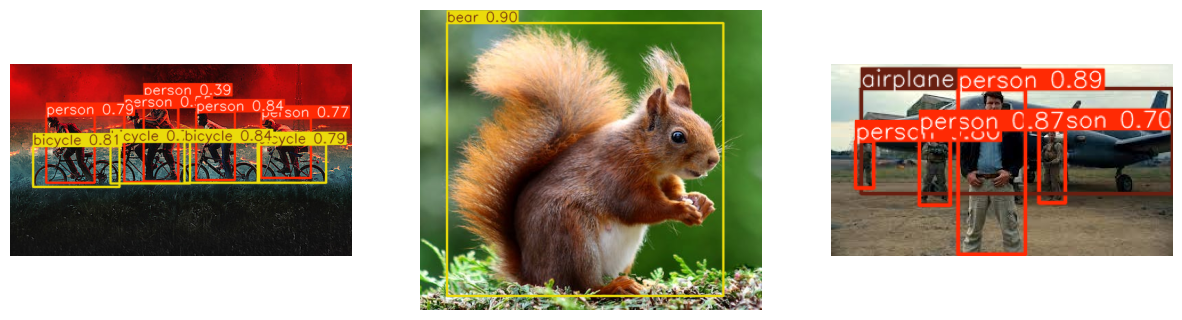

In [16]:
model = YOLO("yolo12s.pt")

image_paths = [
    "../data/st2.jpg",
    "../data/squirrel.jpeg",
    "../data/dkr.jpg"
]

images = []
for path in image_paths:
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    images.append(img)

results = model(images)
plt.figure(figsize=(15,5))

for i, r in enumerate(results):
    plt.subplot(1, len(results), i + 1)
    plt.imshow(r.plot())
    plt.axis("off")

plt.show()

For these images, the model performs almost perfectly (the squirrel gets classified as a bear because the model wasn't trained on squirrels). YOLO can fail on the following cases:

- Very small objects: objects that occupy only a few pixels are hard to localize reliably.

- Heavy occlusion: when objects are partially hidden, the full shape needed for detection may be missing.

- Poor image quality: motion blur, low resolution, strong noise, or low lighting reduce usable features.

- Dense scenes: many overlapping objects can confuse bounding box assignment and suppression.

While this notebook focuses on inference with a pretrained model, YOLO models can also be fine-tuned on custom datasets when higher accuracy or domain-specific object detection is required.